# Used Car Price Prediction



## Problem Statement
---------------------------

Develop a pricing model that can effectively predict the price of used cars and can help businesses in devising profitable strategies using differential pricing. In the process, determine which factors affect the prices of used cars. Conduct this analysis using an appropriate method for prediction of a numerical target variable. Generate a collection of insights and recommendations to help the business.

## Data Information
---------------------------
[Source - Kaggle](https://www.kaggle.com/datasets/goyalshalini93/car-data?select=CarPrice_Assignment.csv)

Variables(in order):
- **Car_ID -**(numerical variable): Car identifier.

- **Symboling -** (categorical variable): average degree of auto is more risky than its price indicates

- **CarName -** (categorical variable): models of different car makes

- **Fueltype -**  (categorical variable): type of fuel used (Gas or Diesel)

- **Aspiration-** (categorical variable): types of car engines (Std or Turbo)

- **Doornumber-** (categorical variable): the number of doors in the car(two or four)

- **Carbody-** (categorical variable): types of car body styles(convertible, hatchback,  sedan, wagon, hatchtop)

- **Drivewheel-** (categorical variable): drive mode (rwd, fwd, 4wd)

- **Enginelocation-** (categorical variable): engine installation location(front or rear)

- **Wheelbase-** (numerical variable): The horizontal distance between the centers of the front and rear wheels of the car

- **Carlength:-**(numerical variable): length of vehicle

- **Carwidth-** (numerical variable): width of vehicle

- **Carheight-** (numerical variable): height of vehicle

- **Curbweight-** (numerical variable): weight of vehicle

- **Enginetype-** (categorical variable): The type of engine or engines powering the vehicle. (dohc, dohcv, ohcv, ohc, ohcf,  rotor, l)

- **Cylindernumber-** (categorical variable): The number of cylinders of the engine(two, twelve, three, four, five, six, eight)

- **Enginesize-**  (numerical variable): The size of the engine

- **Fuelsystem-** (categorical variable): Fuel system of the engine(1bbl, 2bbl, 4bbl, idi, mfi, mpfi,  spdi, spfi)

- **Boreratio-** (numerical variable): The ratio between the size of the cylinder bore of an engine and its piston stroke length

- **Stroke-** (numerical variable): A phase of the engine's cycle

- **Compressionratio-** (numerical variable): The ratio of the cylinders and combustion chambers of an engine at their maximum and minimum values

- **Horsepower-** (numerical variable): The output power of the engine

- **Peakrpm-** (numerical variable): The engine's peak horsepower speed

- **Citympg-** (numerical variable): Fuel consumption in urban driving

- **Highwaympg-** (numerical variable): The fuel consumption of the car when driving on the open road

- **Price-** (numerical variable): The price of a car.
     
###  Source:
 Dataset from :https://www.kaggle.com/datasets/goyalshalini93/car-data


##Import the necessary libraries

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

##Read in the data set using the code:

In [ ]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/133Ik34Vt1Vyfy8PokzK0VPXobvCQFKgR/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
car = pd.read_csv(csv_raw, sep=",")

# Examine the first few lines of the data set using the method
car.head()

ï»¿car_ID                   CarName  wheelbase  carlength  carwidth  \
0          1        alfa-romero giulia       88.6      168.8      64.1   
1          2       alfa-romero stelvio       88.6      168.8      64.1   
2          3  alfa-romero Quadrifoglio       94.5      171.2      65.5   
3          4               audi 100 ls       99.8      176.6      66.2   
4          5                audi 100ls       99.4      176.6      66.4   

   carheight  curbweight  enginesize  boreratio  stroke  ...  \
0       48.8        2548         130       3.47    2.68  ...   
1       48.8        2548         130       3.47    2.68  ...   
2       52.4        2823         152       2.68    3.47  ...   
3       54.3        2337         109       3.19    3.40  ...   
4       54.3        2824         136       3.19    3.40  ...   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_1bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0                1                0                0  
1                1                0                0  
2                1                0                0  
3                1                0                0  
4                1                0                0  

[5 rows x 60 columns]

The price of the cars indicated by the variable PRICE is the target variable and the rest are the independent variables based on which we will predict car price.

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ï»¿car_ID              205 non-null    int64  
 1   CarName                205 non-null    object 
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  price 

all 59 variables have 205 non-null variables. There are no empty cells and contain a variation of intergers, floats, and objects

In [ ]:
car = car.drop(['ï»¿car_ID', 'CarName'],axis=1)

Removing CarID and Car Name columns from the dataset as they are not relevant to determining the price of each car

In [ ]:
car.describe().T

count          mean          std      min      25%  \
wheelbase              205.0     98.756585     6.021776    86.60    94.50   
carlength              205.0    174.049268    12.337289   141.10   166.30   
carwidth               205.0     65.907805     2.145204    60.30    64.10   
carheight              205.0     53.724878     2.443522    47.80    52.00   
curbweight             205.0   2555.565854   520.680204  1488.00  2145.00   
enginesize             205.0    126.907317    41.642693    61.00    97.00   
boreratio              205.0      3.329756     0.270844     2.54     3.15   
stroke                 205.0      3.255415     0.313597     2.07     3.11   
compressionratio       205.0     10.142537     3.972040     7.00     8.60   
horsepower             205.0    104.117073    39.544167    48.00    70.00   
peakrpm                205.0   5125.121951   476.985643  4150.00  4800.00   
citympg                205.0     25.219512     6.542142    13.00    19.00   
highwaympg             205.0     30.751220     6.886443    16.00    25.00   
price                  205.0  13276.710571  7988.852332  5118.00  7788.00   
symboling_-1           205.0      0.107317     0.310274     0.00     0.00   
symboling_-2           205.0      0.014634     0.120377     0.00     0.00   
symboling_0            205.0      0.326829     0.470202     0.00     0.00   
symboling_1            205.0      0.263415     0.441564     0.00     0.00   
symboling_2            205.0      0.156098     0.363836     0.00     0.00   
symboling_3            205.0      0.131707     0.339000     0.00     0.00   
fueltype_diesel        205.0      0.097561     0.297446     0.00     0.00   
fueltype_gas           205.0      0.902439     0.297446     0.00     1.00   
aspiration_std         205.0      0.819512     0.385535     0.00     1.00   
aspiration_turbo       205.0      0.180488     0.385535     0.00     0.00   
doornumber_four        205.0      0.560976     0.497483     0.00     0.00   
doornumber_two         205.0      0.439024     0.497483     0.00     0.00   
carbody_convertible    205.0      0.029268     0.168970     0.00     0.00   
carbody_hardtop        205.0      0.039024     0.194127     0.00     0.00   
carbody_hatchback      205.0      0.341463     0.475361     0.00     0.00   
carbody_sedan          205.0      0.468293     0.500215     0.00     0.00   
carbody_wagon          205.0      0.121951     0.328031     0.00     0.00   
drivewheel_4wd         205.0      0.043902     0.205380     0.00     0.00   
drivewheel_fwd         205.0      0.585366     0.493865     0.00     0.00   
drivewheel_rwd         205.0      0.370732     0.484183     0.00     0.00   
enginelocation_front   205.0      0.985366     0.120377     0.00     1.00   
enginelocation_rear    205.0      0.014634     0.120377     0.00     0.00   
enginetype_dohc        205.0      0.058537     0.235330     0.00     0.00   
enginetype_dohcv       205.0      0.004878     0.069843     0.00     0.00   
enginetype_l           205.0      0.058537     0.235330     0.00     0.00   
enginetype_ohc         205.0      0.721951     0.449134     0.00     0.00   
enginetype_ohcf        205.0      0.073171     0.261054     0.00     0.00   
enginetype_ohcv        205.0      0.063415     0.244304     0.00     0.00   
enginetype_rotor       205.0      0.019512     0.138655     0.00     0.00   
cylindernumber_eight   205.0      0.024390     0.154635     0.00     0.00   
cylindernumber_five    205.0      0.053659     0.225894     0.00     0.00   
cylindernumber_four    205.0      0.775610     0.418201     0.00     1.00   
cylindernumber_six     205.0      0.117073     0.322294     0.00     0.00   
cylindernumber_three   205.0      0.004878     0.069843     0.00     0.00   
cylindernumber_twelve  205.0      0.004878     0.069843     0.00     0.00   
cylindernumber_two     205.0      0.019512     0.138655     0.00     0.00   
fuelsystem_1bbl        205.0      0.053659     0.225894     0.00     0.00   
fuelsystem_2bbl    

General statistics (min,max,mean,etc.) for each variable of the dataset

**Compression Ratio: Converting high/low values to categorical data**

In [ ]:
car['compressionratio'] = np.where(car['compressionratio']>15,1,0)

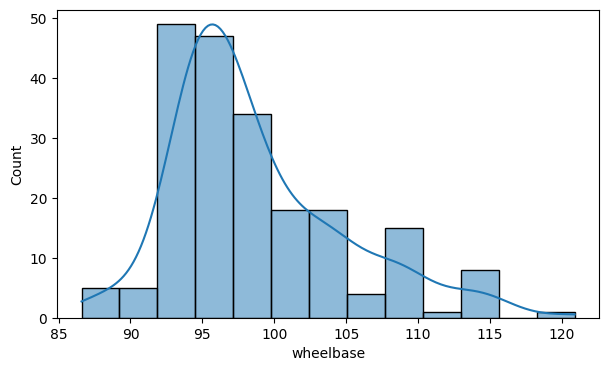

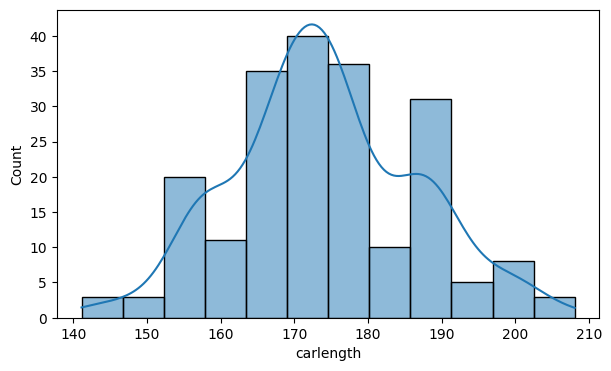

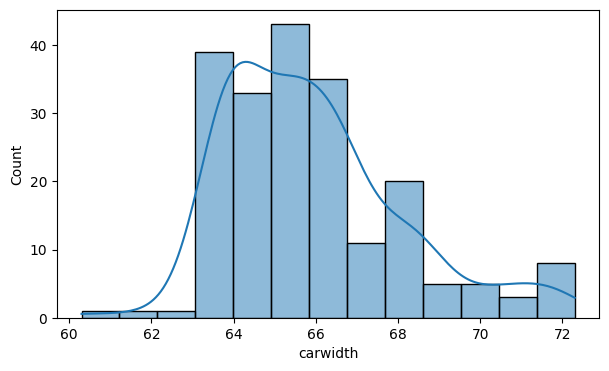

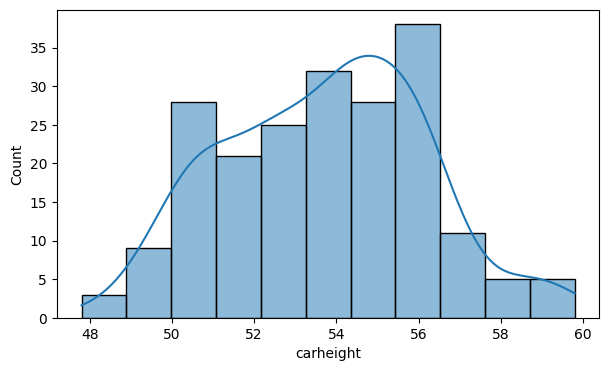

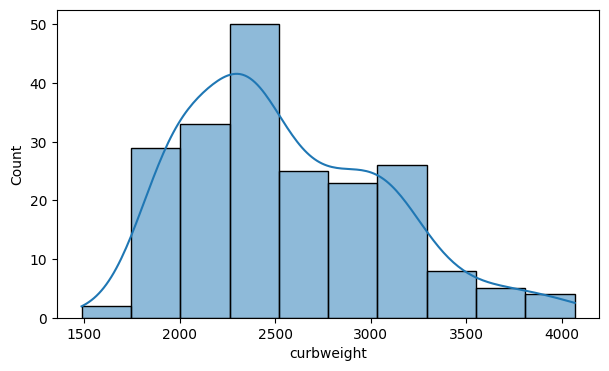

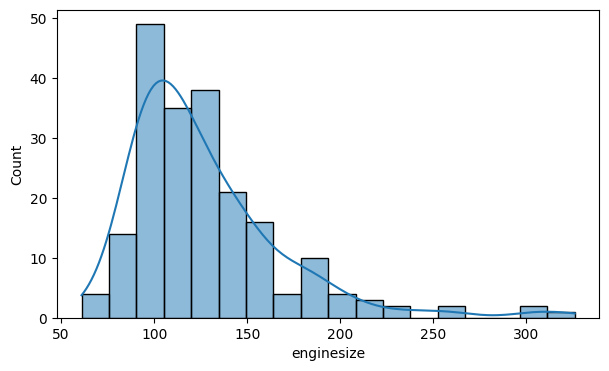

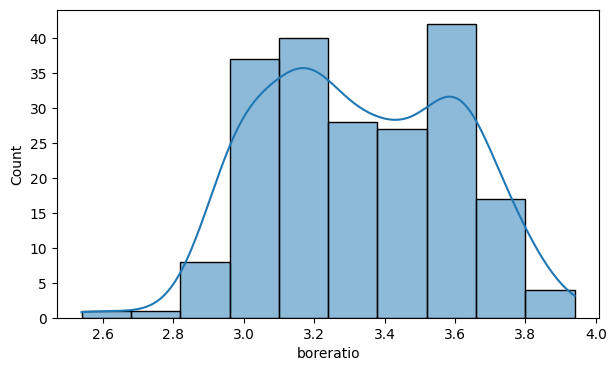

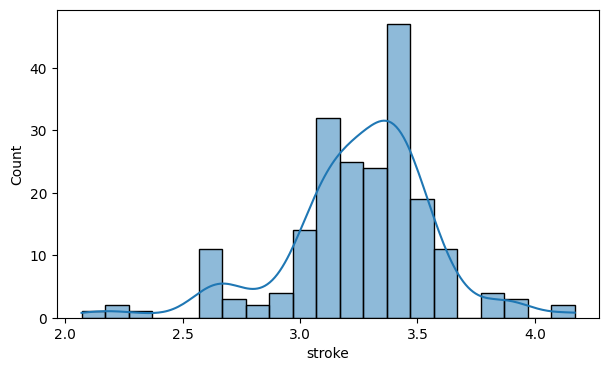

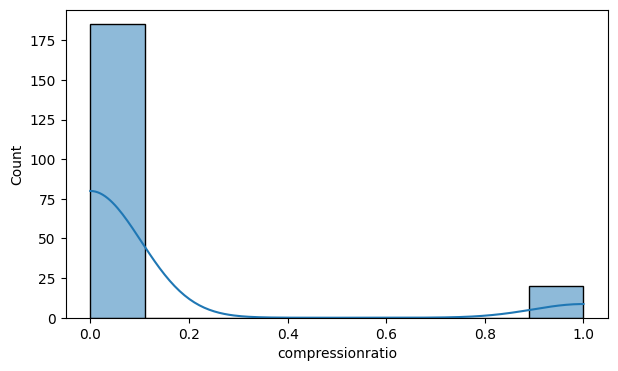

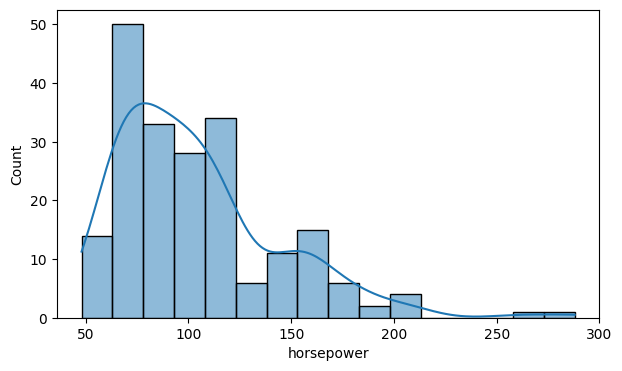

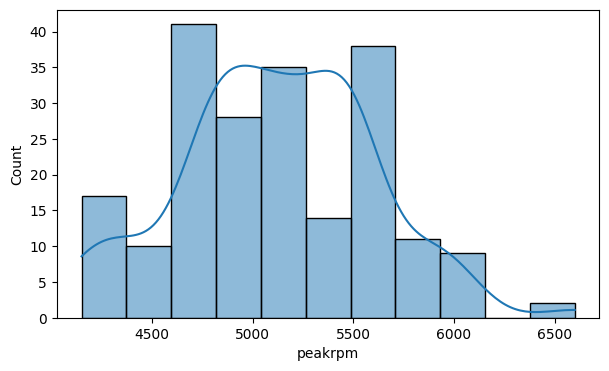

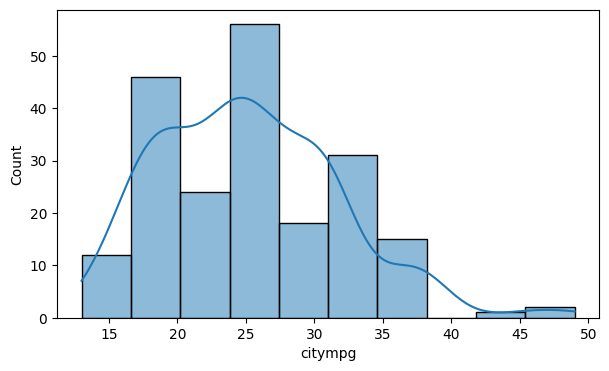

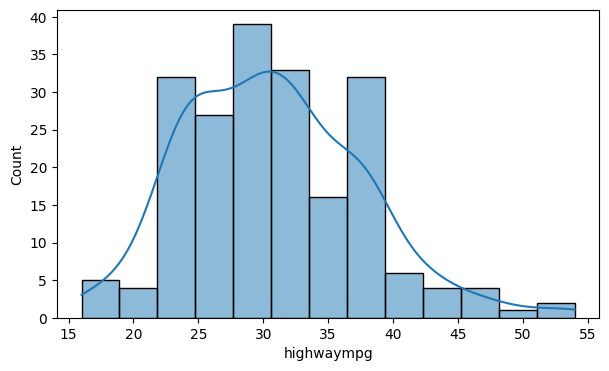

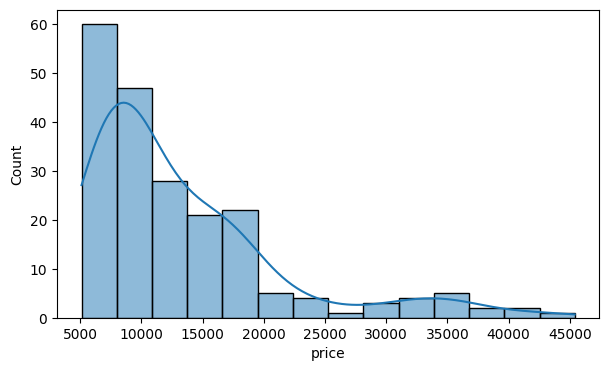

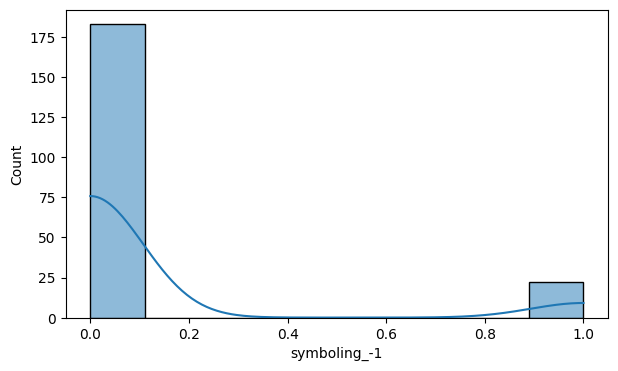

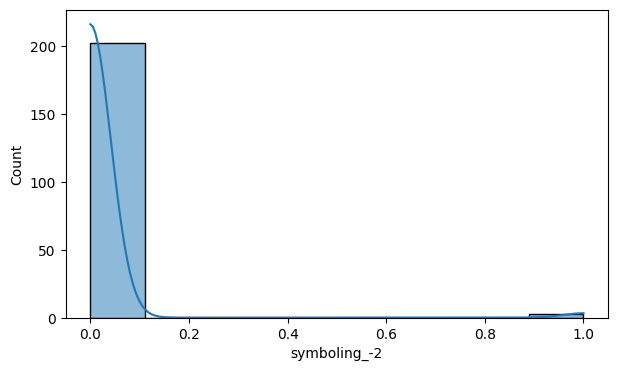

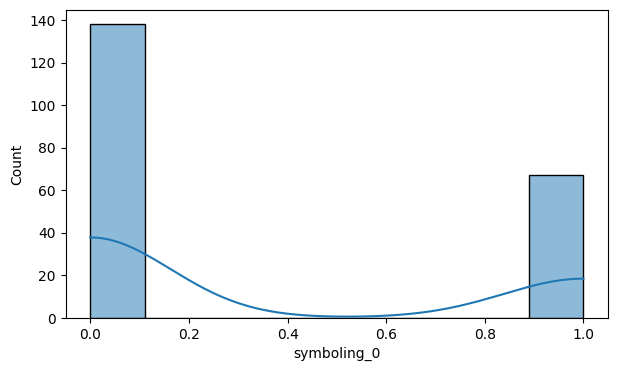

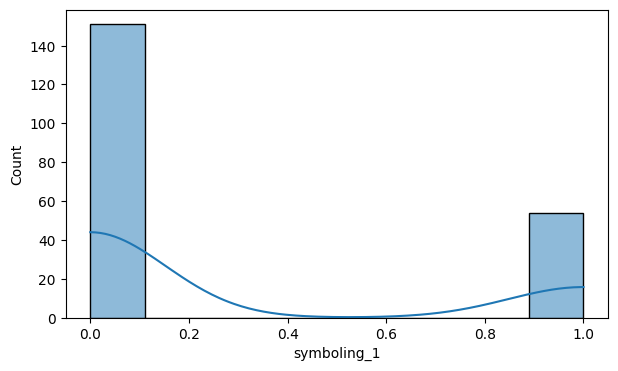

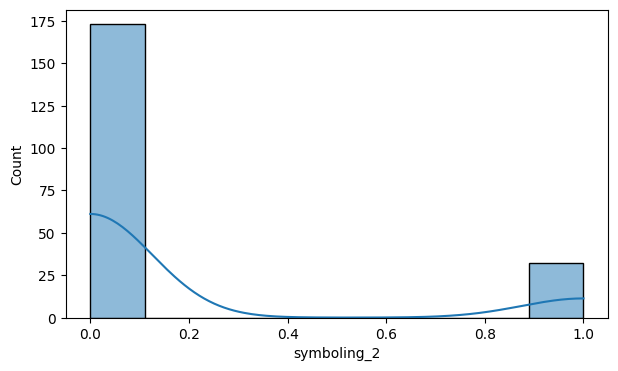

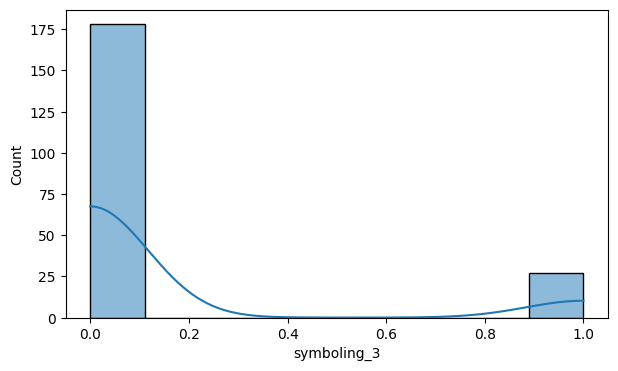

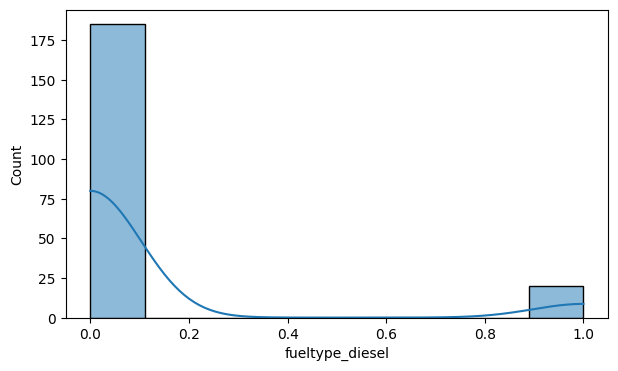

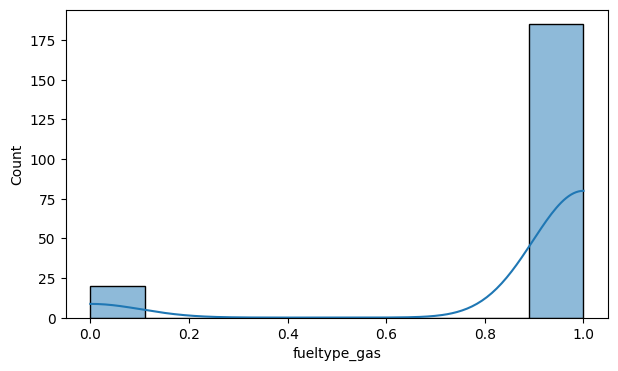

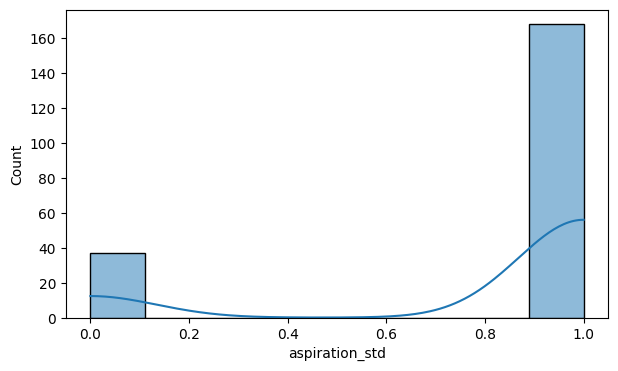

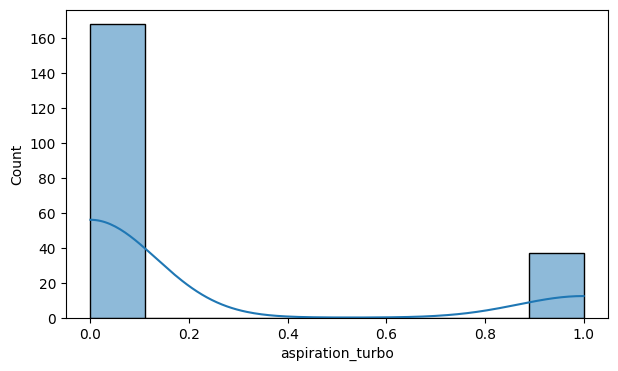

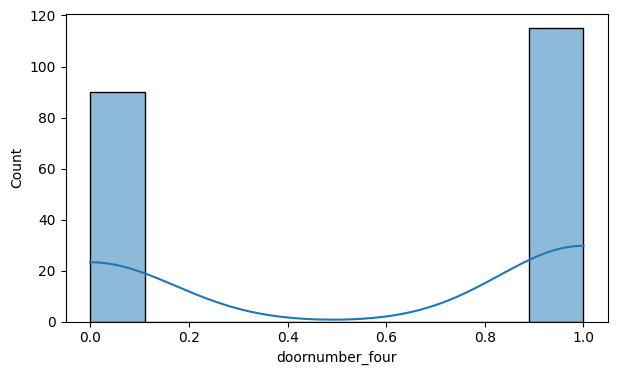

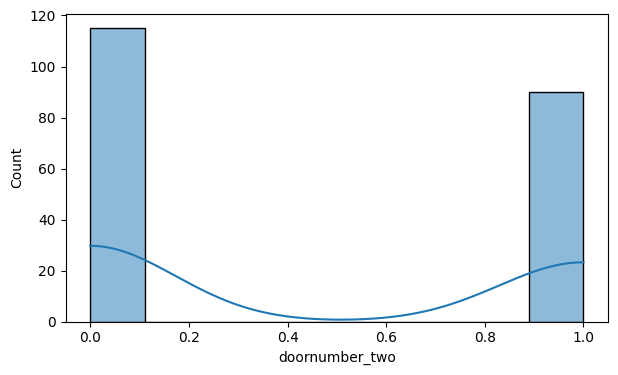

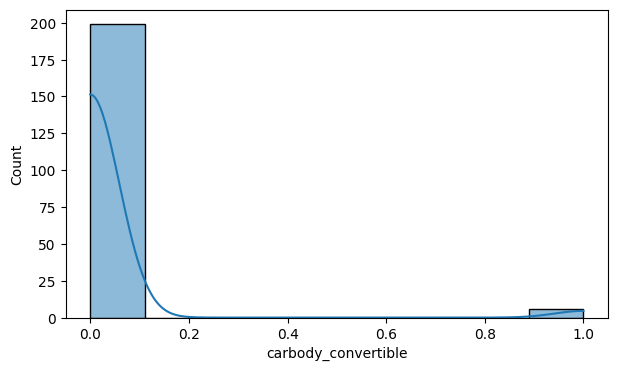

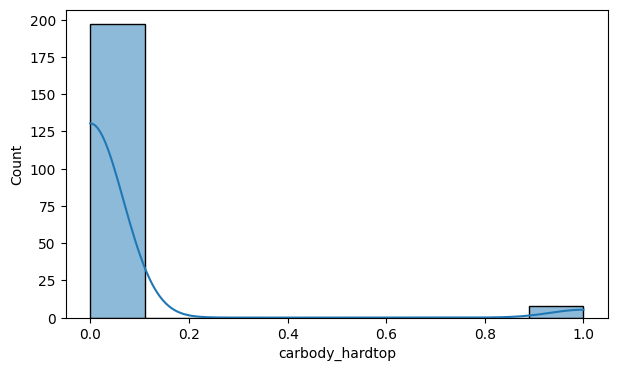

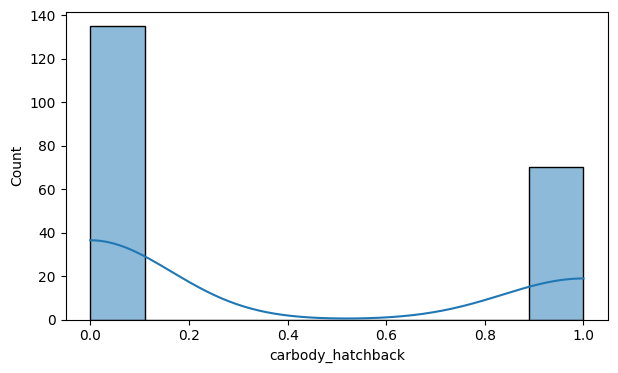

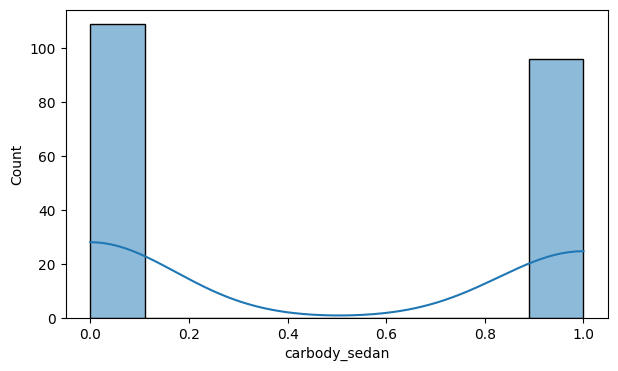

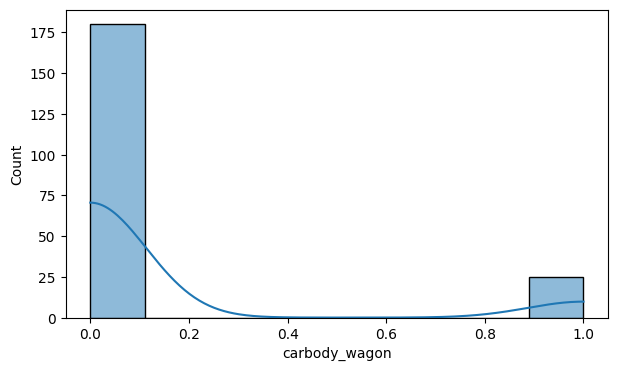

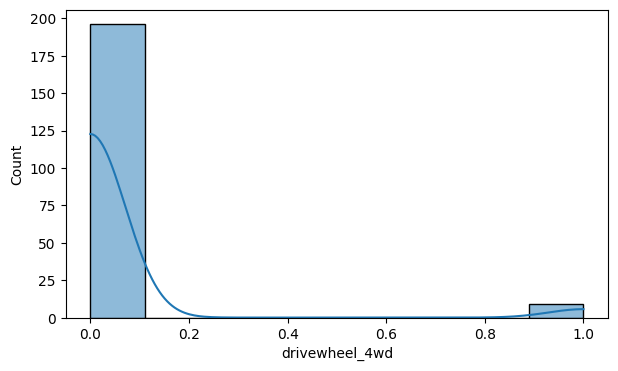

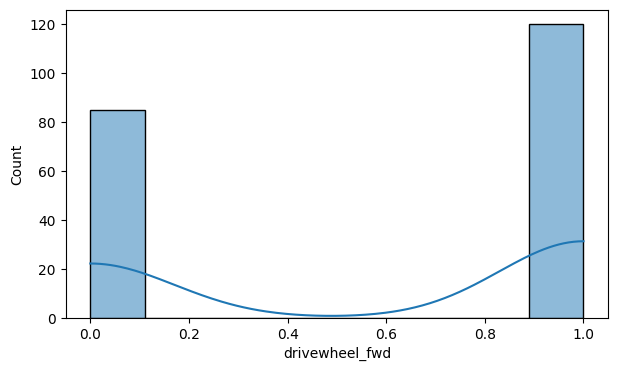

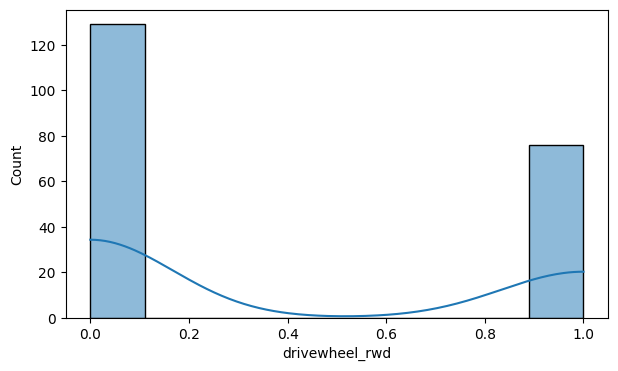

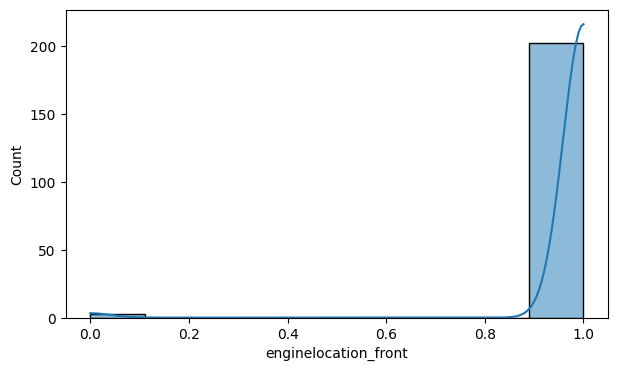

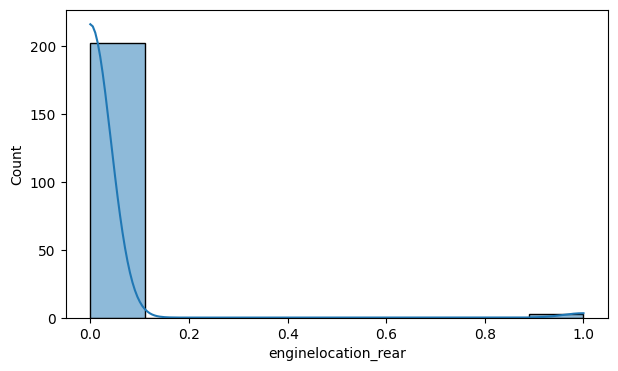

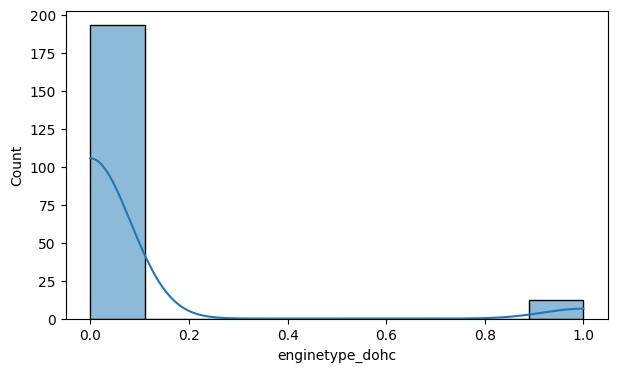

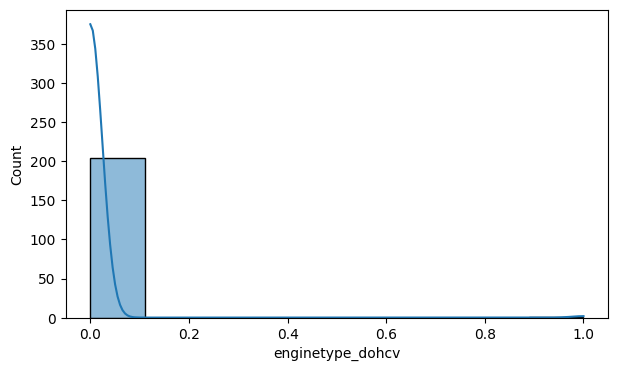

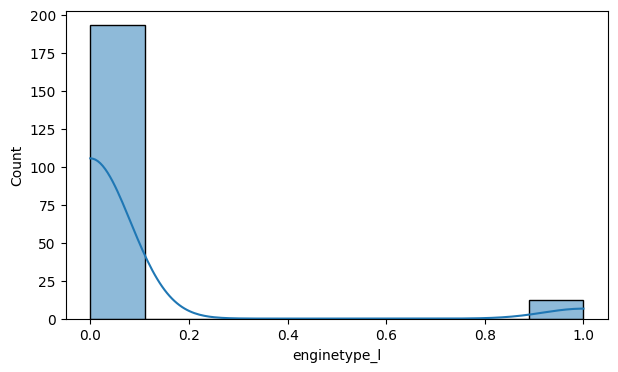

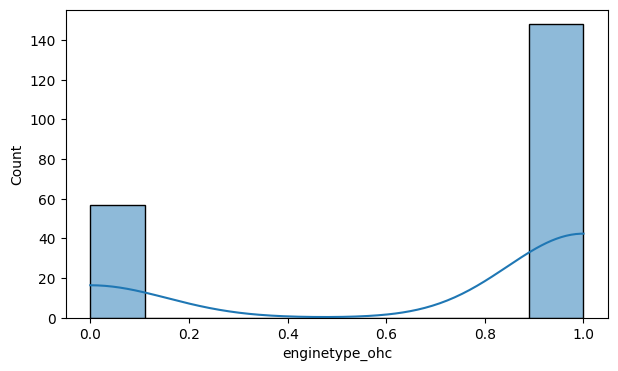

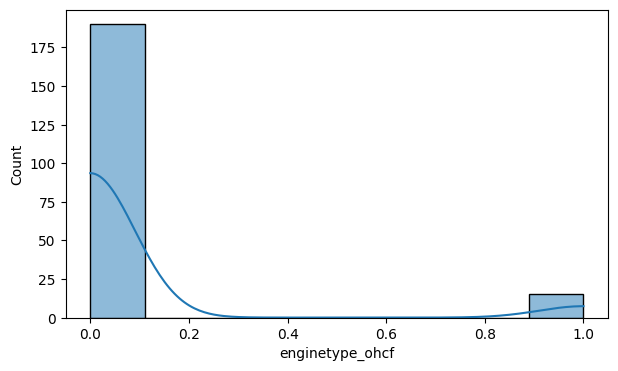

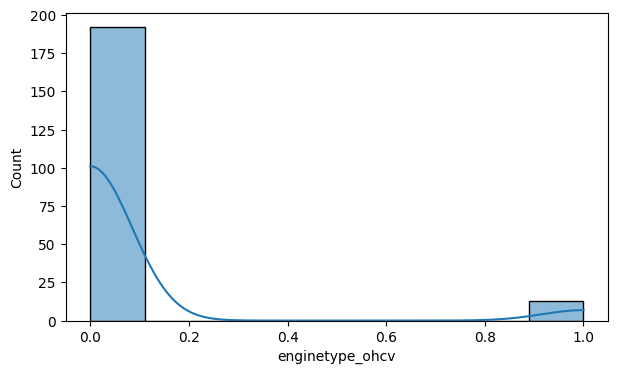

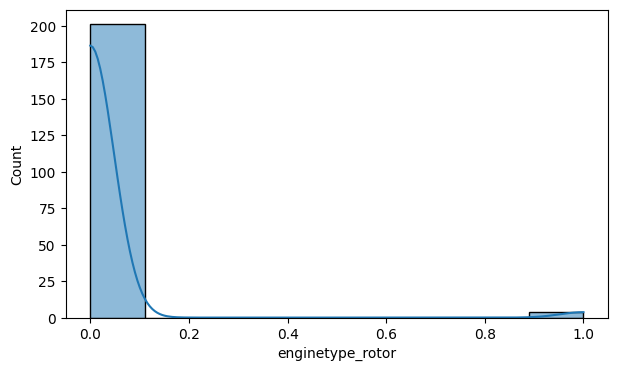

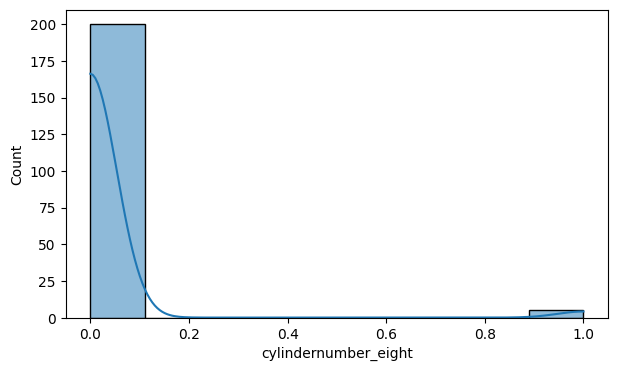

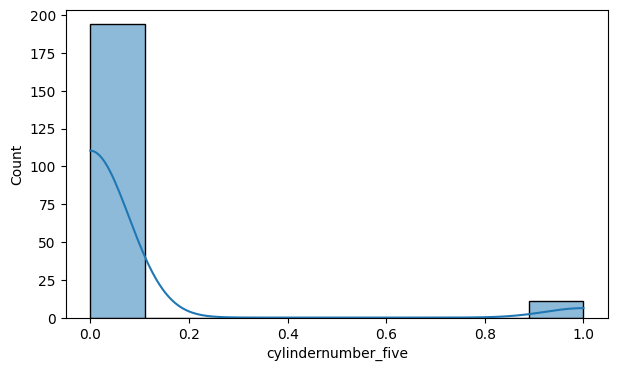

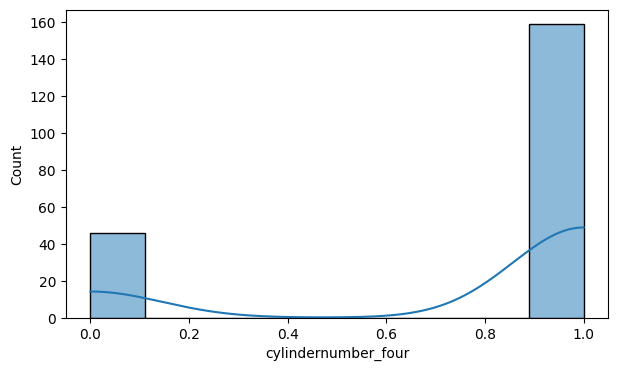

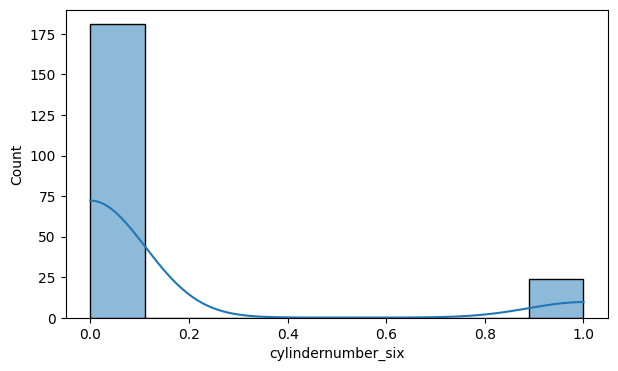

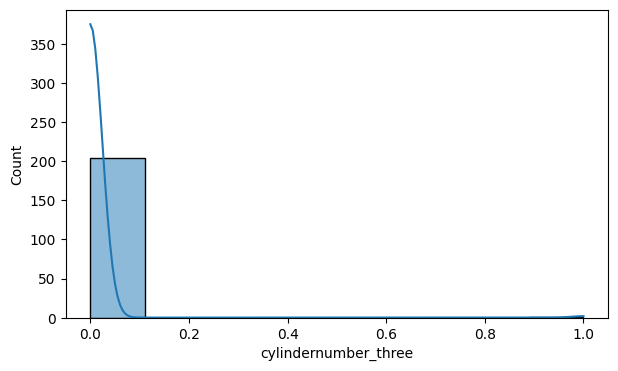

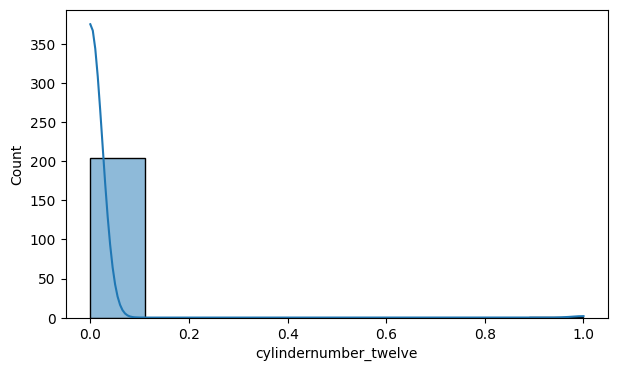

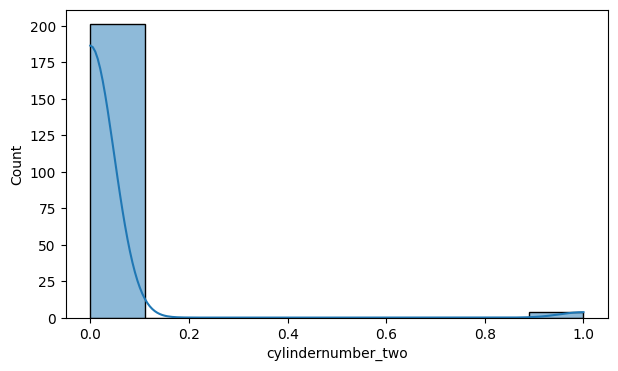

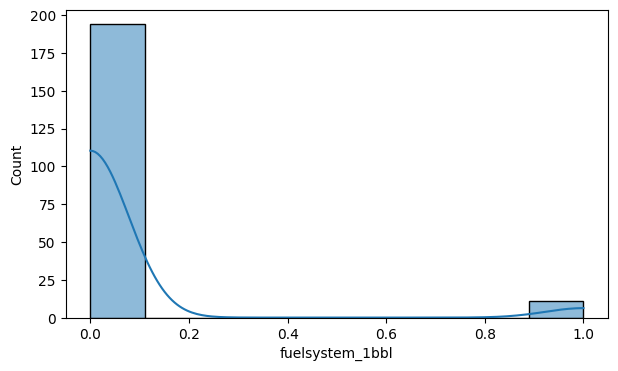

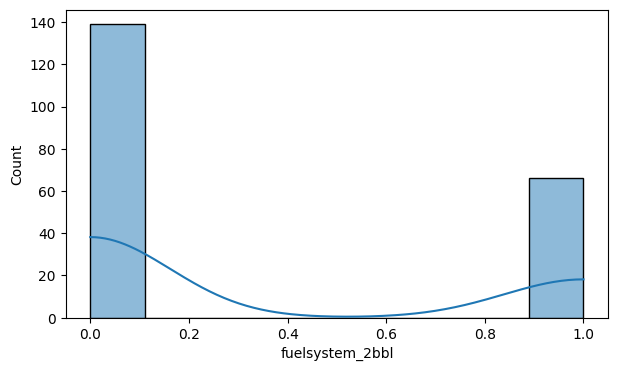

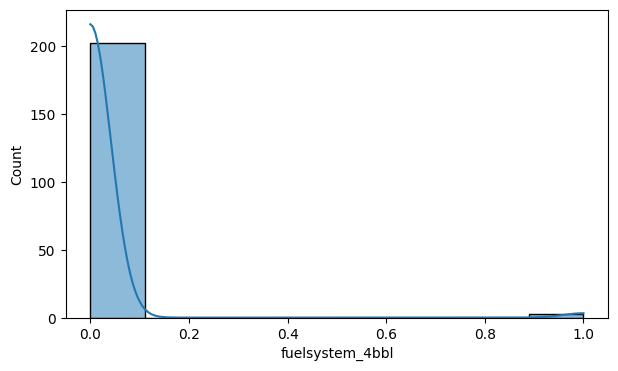

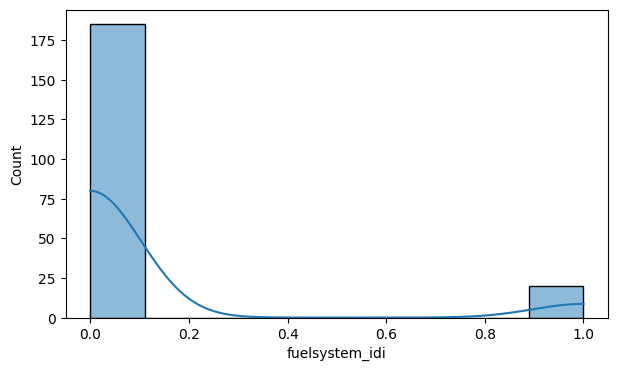

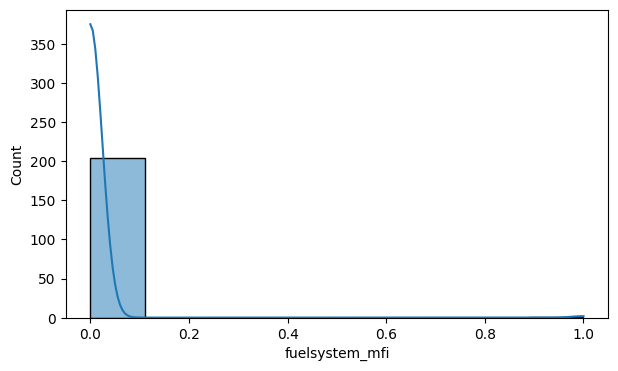

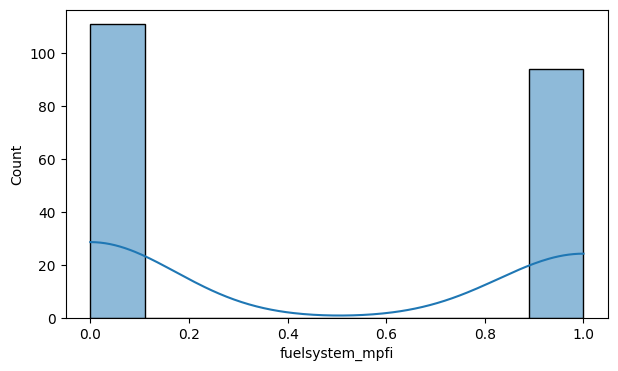

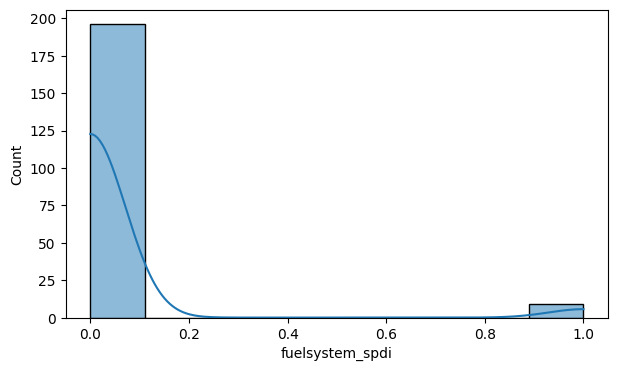

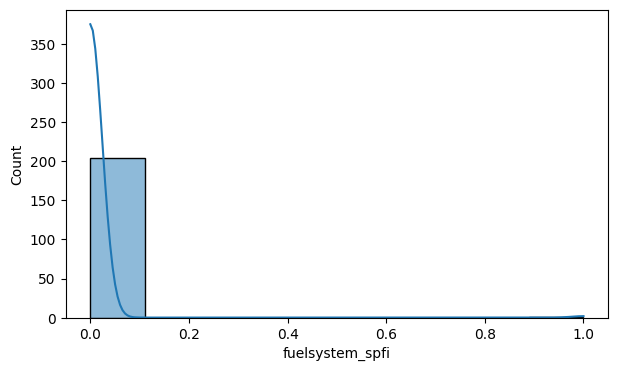

In [ ]:
for i in car.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=car, x=i, kde = True)
    plt.show()

In [ ]:
car['price_log'] = np.log(car['price'])

<Axes: xlabel='price_log', ylabel='Count'>

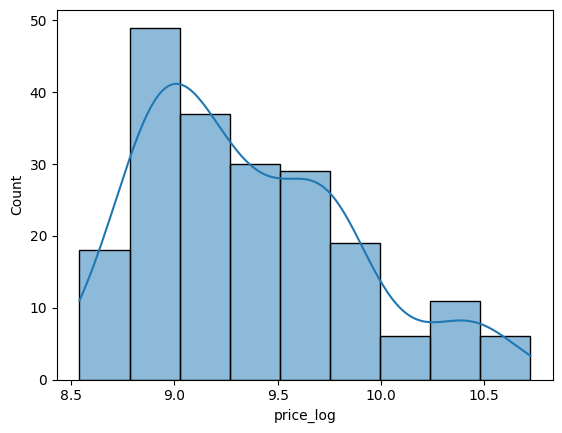

In [ ]:
sns.histplot(data=car, x='price_log', kde = True)

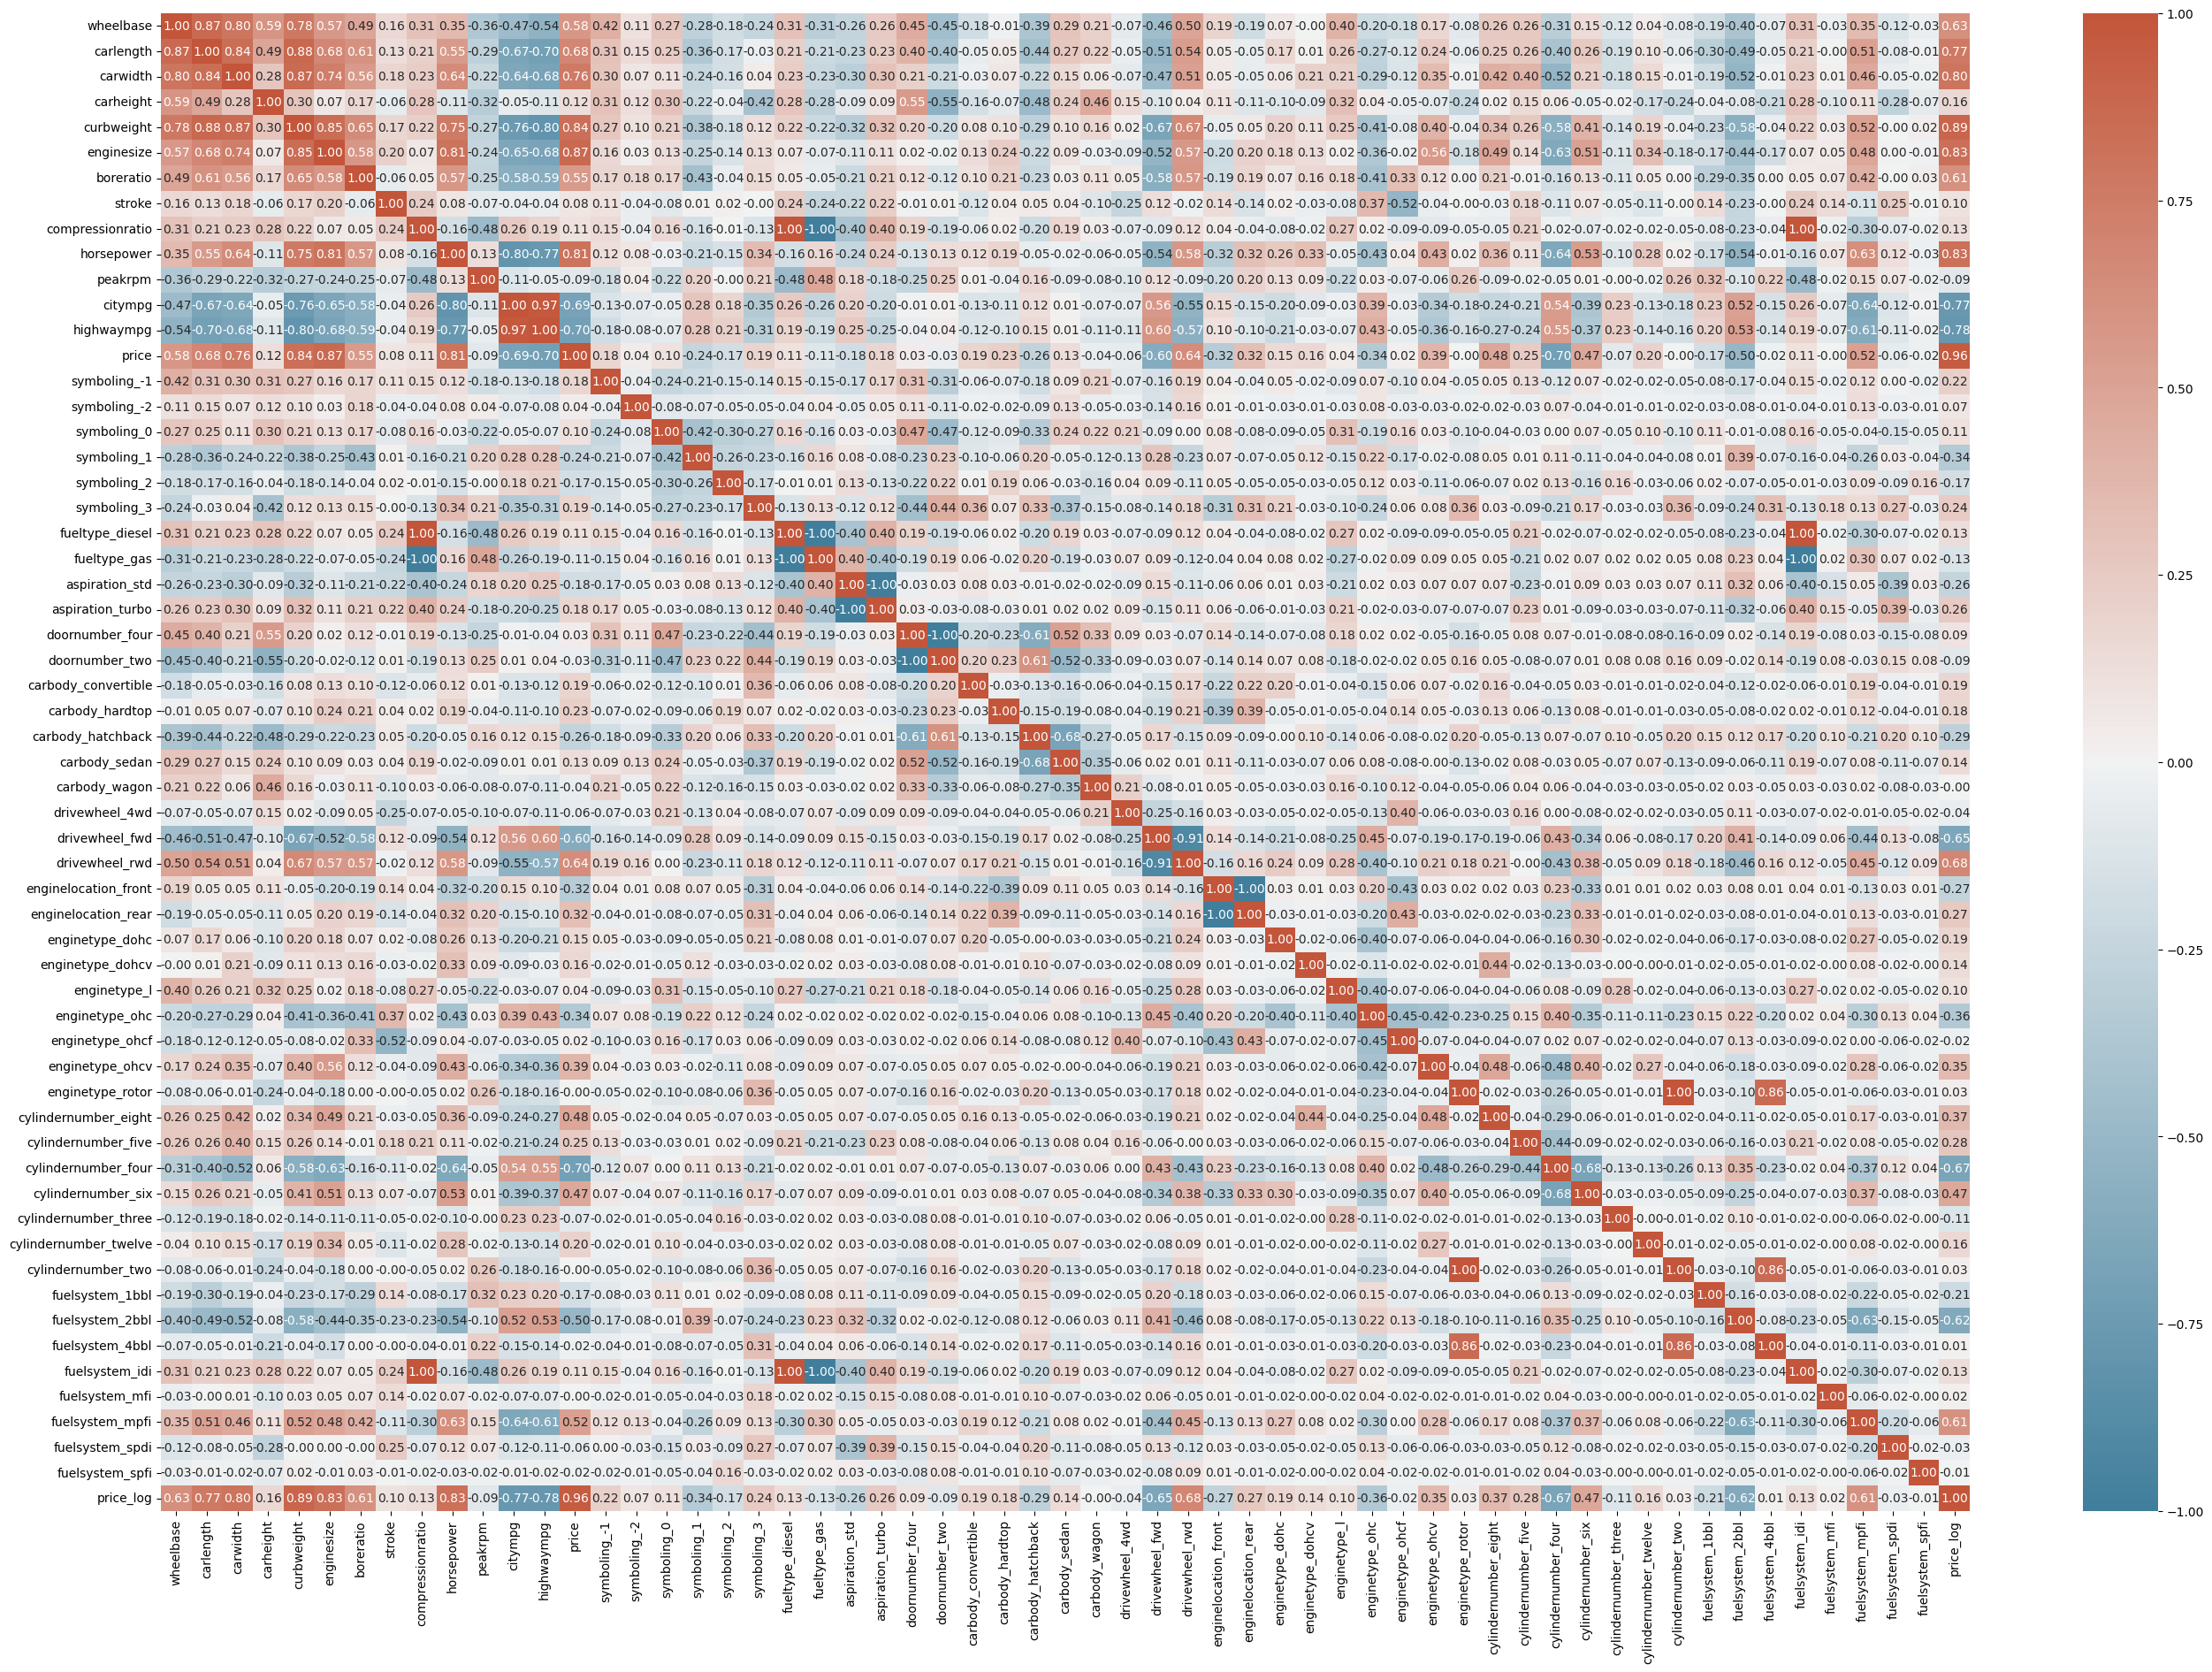

In [ ]:
plt.figure(figsize=(33,22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(car.corr(),annot=True,fmt='.2f',cmap=cmap ) #write your code here
plt.show()

This heat map shows the variables with the highest collinearity based off of the color scale to the right

In [ ]:
data = car

# Compute the correlation matrix
correlation_matrix = data.corr()

# Filter out perfect correlations (1 or -1)
correlation_matrix_filtered = correlation_matrix[
    (correlation_matrix < 1) & (correlation_matrix > -1)
]

# Get the top 20 most correlated pairs from the filtered matrix
# We use the absolute correlation values to find the strongest positive and negative correlations
top_correlations = correlation_matrix_filtered.unstack().sort_values(ascending=False, key=abs)
top_20_correlations = top_correlations[0:20]

# Print the top 20 correlated variable pairs
print("Top 20 correlated variable pairs (excluding perfect correlations):")
print(top_20_correlations)


Top 20 correlated variable pairs (excluding perfect correlations):
highwaympg          citympg               0.971337
citympg             highwaympg            0.971337
price_log           price                 0.957655
price               price_log             0.957655
drivewheel_rwd      drivewheel_fwd       -0.911996
drivewheel_fwd      drivewheel_rwd       -0.911996
curbweight          price_log             0.891237
price_log           curbweight            0.891237
curbweight          carlength             0.877728
carlength           curbweight            0.877728
                    wheelbase             0.874587
wheelbase           carlength             0.874587
price               enginesize            0.874145
enginesize          price                 0.874145
curbweight          carwidth              0.867032
carwidth            curbweight            0.867032
enginetype_rotor    fuelsystem_4bbl       0.863879
fuelsystem_4bbl     enginetype_rotor      0.863879
cylindernumber_

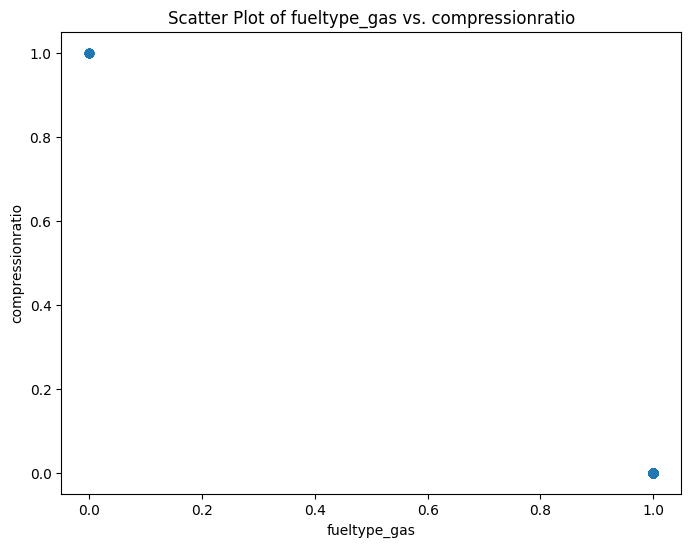

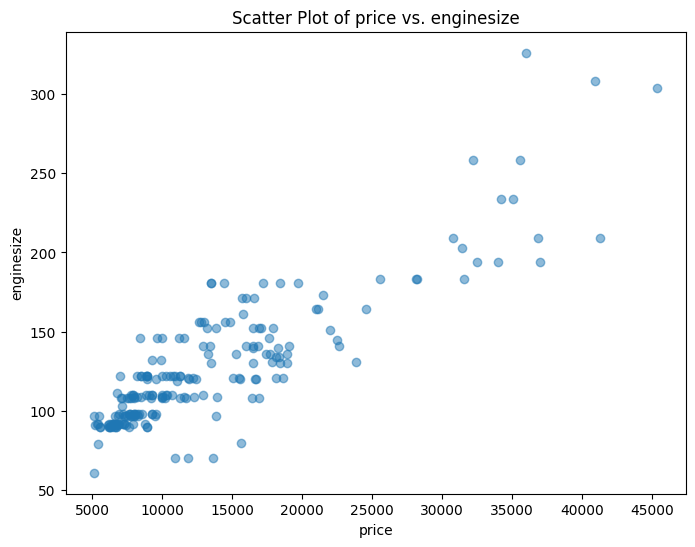

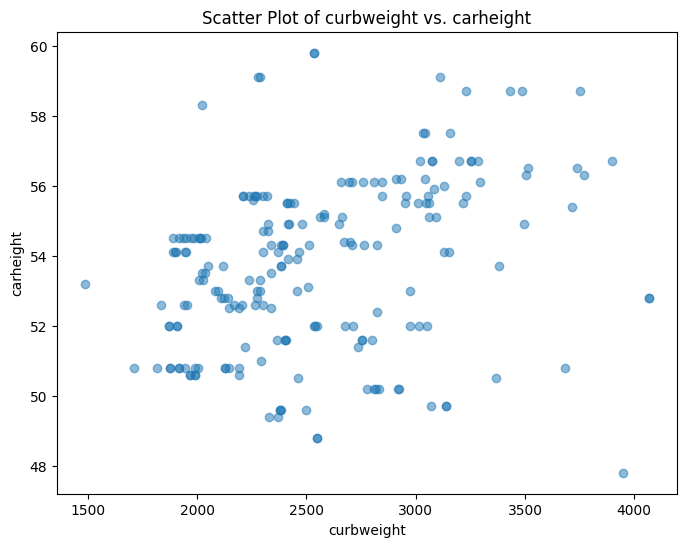

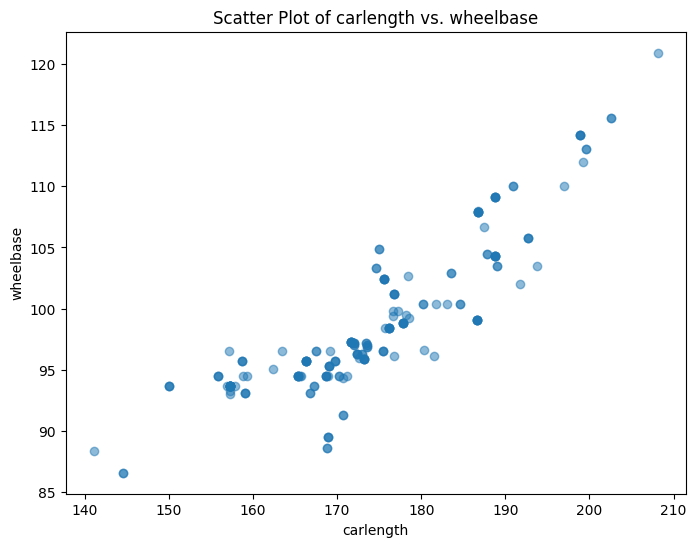

In [ ]:
data = car

# List of variable pairs to create scatter plots for
variable_pairs = [
    ('fueltype_gas', 'compressionratio'),
    ('price', 'enginesize'),
    ('curbweight', 'carheight'),
    ('carlength', 'wheelbase')
]

# Create scatter plots for each variable pair
for var1, var2 in variable_pairs:
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.scatter(data[var1], data[var2], alpha=0.5)  # Create the scatter plot
    plt.title(f'Scatter Plot of {var1} vs. {var2}')  # Set the plot title
    plt.xlabel(var1)  # Label for the x-axis
    plt.ylabel(var2)  # Label for the y-axis

# Show the plots
plt.show()


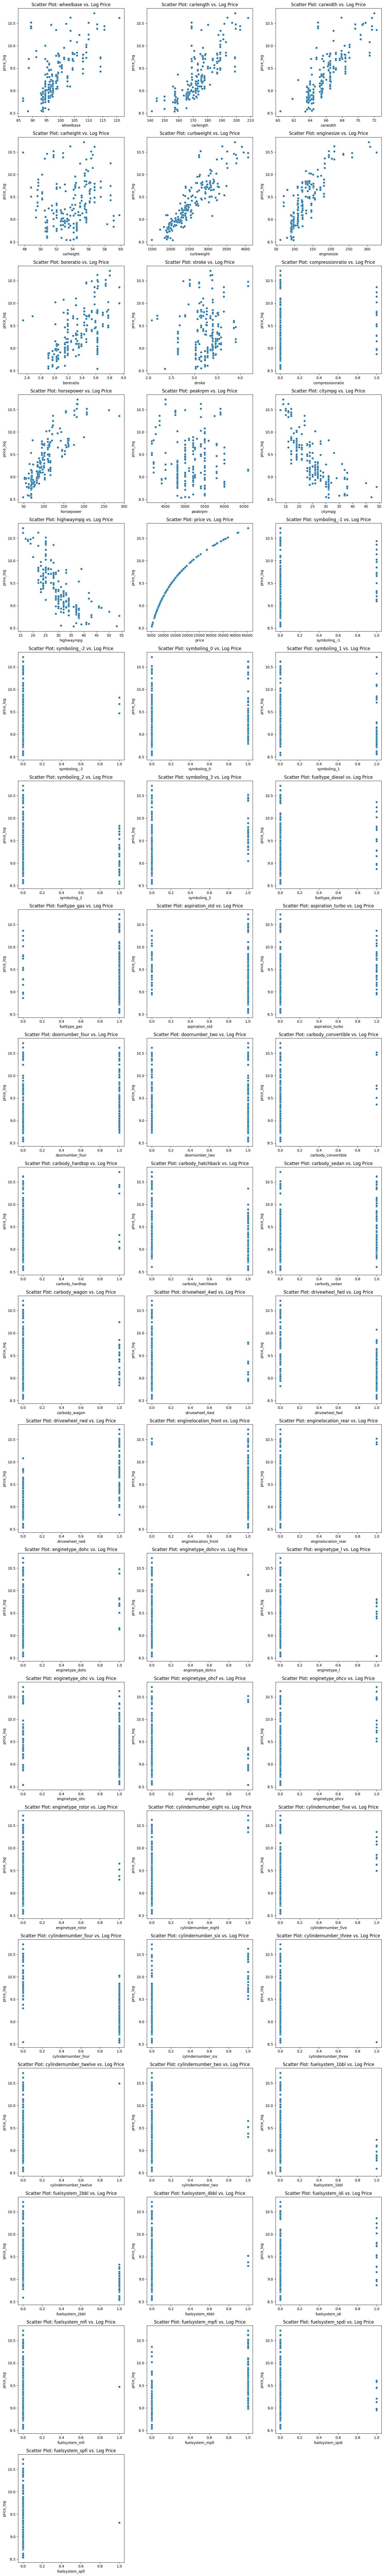

In [ ]:
features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
            'highwaympg', 'price', 'symboling_-1', 'symboling_-2', 'symboling_0', 'symboling_1',
            'symboling_2', 'symboling_3', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
            'aspiration_turbo', 'doornumber_four', 'doornumber_two', 'carbody_convertible',
            'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
            'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
            'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
            'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
            'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
            'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
            'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
            'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
            'fuelsystem_spfi']

# Set the number of columns and rows for subplots
num_cols = 3
num_rows = (len(features) + num_cols - 1) // num_cols

# Set the size of the overall plot
plt.figure(figsize=(15, 5 * num_rows))

# Create scatter plots for each feature against the log-transformed price
for i, feature in enumerate(features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=car[feature], y=car['price_log'])
    plt.title(f'Scatter Plot: {feature} vs. Log Price')

# Adjust layout
plt.tight_layout()
plt.show()

Split the dataset

In [ ]:
#define category features
car_cat = car.select_dtypes(include=['object'])

# Calculate and display the number of unique values for each category columns
for column in car_cat.columns:
    unique_count = car_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

In [ ]:
car.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  ...  cylindernumber_two  \
0       3.47    2.68                 0         111  ...                   0   
1       3.47    2.68                 0         111  ...                   0   
2       2.68    3.47                 0         154  ...                   0   
3       3.19    3.40                 0         102  ...                   0   
4       3.19    3.40                 0         115  ...                   0   

   fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   
1               0                1                0                0   
2               0                1                0                0   
3               0                1                0                0   
4               0                1                0                0   

   price_log  
0   9.510075  
1   9.711116  
2   9.711116  
3   9.543235  
4   9.767095  

[5 rows x 59 columns]

In [ ]:
# separate the dependent and indepedent variable
Y = car['price_log']
X = car.drop(columns = {'price', 'price_log'})

# add the intercept term
X = sm.add_constant(X)

^Seperating the dependent and independent variable as well as setting the intercept term for the regression equation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

^ splitting the data in 70:30 ratio of train to test data


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 124 to 37
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  143 non-null    float64
 1   wheelbase              143 non-null    float64
 2   carlength              143 non-null    float64
 3   carwidth               143 non-null    float64
 4   carheight              143 non-null    float64
 5   curbweight             143 non-null    int64  
 6   enginesize             143 non-null    int64  
 7   boreratio              143 non-null    float64
 8   stroke                 143 non-null    float64
 9   compressionratio       143 non-null    int64  
 10  horsepower             143 non-null    int64  
 11  peakrpm                143 non-null    int64  
 12  citympg                143 non-null    int64  
 13  highwaympg             143 non-null    int64  
 14  symboling_-1           143 non-null    int64  
 15  symbo

Check for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif


In [ ]:
print(checking_vif(X_train))

                  feature        VIF
0                   const   0.000000
1               wheelbase  16.410843
2               carlength  17.041720
3                carwidth  14.562381
4               carheight   4.286769
5              curbweight  32.701713
6              enginesize  49.933447
7               boreratio   7.029486
8                  stroke   3.153065
9        compressionratio        inf
10             horsepower  39.140825
11                peakrpm   4.205734
12                citympg  38.112550
13             highwaympg  36.602416
14           symboling_-1        inf
15           symboling_-2        inf
16            symboling_0        inf
17            symboling_1        inf
18            symboling_2        inf
19            symboling_3        inf
20        fueltype_diesel        inf
21           fueltype_gas        inf
22         aspiration_std        inf
23       aspiration_turbo        inf
24        doornumber_four        inf
25         doornumber_two        inf
2

**Dropping Columns where VIF > 5:** For the purpose of milestone #2, we are not dropping any columns where VIF>5 since we would not be left with enough variables for our model. As we refine our model for the next milestone, we would be looking at ways on which columns we can drop from the model.

In [ ]:
# create the model after dropping
#X_train = X_train.drop(columns=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','compressionratio','horsepower','citympg','highwaympg']) #Write your code here
# check for VIF
#print(checking_vif(X_train))

**Running the model fit using Ordinary Least Squares**

In [ ]:
model1 = sm.OLS(y_train,X_train).fit()

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     46.35
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.20e-49
Time:                        22:56:08   Log-Likelihood:                 107.85
No. Observations:                 143   AIC:                            -131.7
Df Residuals:                     101   BIC:                            -7.264
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1785      0.252      4.680      0.000       0.679       1.678
wheelbase                 0.0070      0.008      0.910      0.365      -0.008       0.022
carlength                -0.0045      0.004     -1.124      0.264      -0.012       0.003
carwidth                  0.0630      0.020      3.137      0.002       0.023       0.103
carheight                 0.0052      0.009      0.557      0.579      -0.013       0.024
curbweight                0.0002      0.000      1.352      0.179   -8.06e-05       0.000
enginesize                0.0038      0.002      1.964      0.052   -3.81e-05       0.008
boreratio                -0.1295      0.111     -1.170      0.245      -0.349       0.090
stroke                   -0.1680      0.064     -2.627      0.010      -0.295      -0.041
compressionratio          0.3650      0.077      4.737      0.000       0.212       0.518
horsepower                0.0016      0.002      0.962      0.338      -0.002       0.005
peakrpm                1.525e-05   5.09e-05      0.300      0.765   -8.57e-05       0.000
citympg                  -0.0268      0.011     -2.450      0.016      -0.049      -0.005
highwaympg                0.0168      0.010      1.632      0.106      -0.004       0.037
symboling_-1              0.1261      0.065      1.926      0.057      -0.004       0.256
symboling_-2              0.0960      0.092      1.041      0.300      -0.087       0.279
symboling_0               0.2635      0.047      5.629      0.000       0.171       0.356
symboling_1               0.2068      0.056      3.719      0.000       0.096       0.317
symboling_2               0.2331      0.057      4.070      0.000       0.119       0.347
symboling_3               0.2530      0.072      3.529      0.001       0.111       0.395
fueltype_diesel           0.3650      0.077      4.737      0.000       0.212       0.518
fueltype_gas              0.8135      0.179      4.547      0.000       0.459       1.168
aspiration_std            0.5532      0.134      4.140      0.000       0.288       0.818
aspiration_turbo          0.6253      0.128      4.890      0.000       0.372       0.879
doornumber_four           0.5952      0.132      4.503      0.000       0.333       0.857
doornumber_two            0.5833      0.124      4.699      0.000       0.337       0.830
carbody_convertible       0.3793      0.080      4.762      0.000       0.221       0.537
carbody_hardtop           0.0406      0.086      0.470      0.639      -0.131       0.212
carbody_hatchback         0.2066      0.067      3.085      0.003       0.074       0.339
carbody_sedan             0.3022      0.070      4.333      0.000       0.164       0.440
carbody_wagon             0.2498      0.082      3.049      0.003       0.087       0.412
drivewheel_4wd         

**Examining the significance of the model**

In [ ]:
Y = car['price_log']
X = car.drop(columns={'peakrpm', 'cylindernumber_three', 'fuelsystem_mfi', 'curbweight', 'price', 'price_log'}) #write your code here
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train,X_train).fit() #write your code here
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     48.74
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           6.12e-51
Time:                        22:56:08   Log-Likelihood:                 106.54
No. Observations:                 143   AIC:                            -133.1
Df Residuals:                     103   BIC:                            -14.56
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1572      0.242      4.776      0.000       0.677       1.638
wheelbase                 0.0072      0.008      0.951      0.344      -0.008       0.022
carlength                -0.0033      0.004     -0.855      0.395      -0.011       0.004
carwidth                  0.0693      0.019      3.557      0.001       0.031       0.108
carheight                 0.0049      0.009      0.538      0.592      -0.013       0.023
enginesize                0.0049      0.002      3.052      0.003       0.002       0.008
boreratio                -0.1585      0.109     -1.459      0.148      -0.374       0.057
stroke                   -0.1760      0.064     -2.768      0.007      -0.302      -0.050
compressionratio          0.3614      0.075      4.806      0.000       0.212       0.511
horsepower                0.0020      0.002      1.271      0.207      -0.001       0.005
citympg                  -0.0266      0.011     -2.485      0.015      -0.048      -0.005
highwaympg                0.0147      0.010      1.496      0.138      -0.005       0.034
symboling_-1              0.1227      0.065      1.879      0.063      -0.007       0.252
symboling_-2              0.1048      0.091      1.150      0.253      -0.076       0.286
symboling_0               0.2586      0.046      5.683      0.000       0.168       0.349
symboling_1               0.1935      0.052      3.722      0.000       0.090       0.297
symboling_2               0.2302      0.056      4.109      0.000       0.119       0.341
symboling_3               0.2474      0.070      3.512      0.001       0.108       0.387
fueltype_diesel           0.3614      0.075      4.806      0.000       0.212       0.511
fueltype_gas              0.7958      0.171      4.648      0.000       0.456       1.135
aspiration_std            0.5396      0.124      4.336      0.000       0.293       0.786
aspiration_turbo          0.6176      0.126      4.891      0.000       0.367       0.868
doornumber_four           0.5890      0.128      4.588      0.000       0.334       0.844
doornumber_two            0.5682      0.118      4.801      0.000       0.333       0.803
carbody_convertible       0.3794      0.080      4.770      0.000       0.222       0.537
carbody_hardtop           0.0031      0.082      0.038      0.970      -0.159       0.165
carbody_hatchback         0.2051      0.066      3.099      0.003       0.074       0.336
carbody_sedan             0.2997      0.066      4.542      0.000       0.169       0.431
carbody_wagon             0.2699      0.077      3.492      0.001       0.117       0.423
drivewheel_4wd            0.3881      0.097      4.007      0.000       0.196       0.580
drivewheel_fwd            0.3014      0.089      3.386      0.001       0.125       0.478
drivewheel_rwd         

**Checking model performance on testing data**

In [ ]:
Y = car['price_log']
X = car.drop(columns={'peakrpm', 'cylindernumber_three', 'fuelsystem_mfi', 'curbweight', 'price', 'price_log'}) #write your code here
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2_testdata = sm.OLS(y_test,X_test).fit() #write your code here
# get the model summary
model2_testdata.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     35.99
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           4.77e-14
Time:                        22:56:08   Log-Likelihood:                 81.359
No. Observations:                  62   AIC:                            -86.72
Df Residuals:                      24   BIC:                            -5.886
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.2340      0.515      2.394      0.025       0.170       2.298
wheelbase                 0.0270      0.014      1.872      0.073      -0.003       0.057
carlength                -0.0014      0.006     -0.223      0.825      -0.014       0.011
carwidth                  0.0180      0.024      0.739      0.467      -0.032       0.068
carheight                -0.0599      0.017     -3.609      0.001      -0.094      -0.026
enginesize               -0.0079      0.006     -1.245      0.225      -0.021       0.005
boreratio                 1.1513      0.449      2.567      0.017       0.226       2.077
stroke                   -0.1716      0.288     -0.597      0.556      -0.765       0.422
compressionratio          0.3971      0.144      2.765      0.011       0.101       0.694
horsepower                0.0040      0.003      1.377      0.181      -0.002       0.010
citympg                  -0.0405      0.019     -2.150      0.042      -0.079      -0.002
highwaympg                0.0432      0.020      2.183      0.039       0.002       0.084
symboling_-1              0.3237      0.163      1.985      0.059      -0.013       0.660
symboling_-2          -3.487e-15   4.57e-15     -0.764      0.452   -1.29e-14    5.94e-15
symboling_0               0.2552      0.105      2.424      0.023       0.038       0.472
symboling_1               0.1637      0.115      1.423      0.168      -0.074       0.401
symboling_2               0.0759      0.107      0.707      0.486      -0.146       0.298
symboling_3               0.4156      0.115      3.623      0.001       0.179       0.652
fueltype_diesel           0.3971      0.144      2.765      0.011       0.101       0.694
fueltype_gas              0.8369      0.391      2.140      0.043       0.030       1.644
aspiration_std            0.6111      0.256      2.386      0.025       0.082       1.140
aspiration_turbo          0.6230      0.269      2.318      0.029       0.068       1.178
doornumber_four           0.6055      0.258      2.346      0.028       0.073       1.138
doornumber_two            0.6286      0.260      2.413      0.024       0.091       1.166
carbody_convertible       0.6088      0.148      4.126      0.000       0.304       0.913
carbody_hardtop           0.2035      0.135      1.506      0.145      -0.075       0.482
carbody_hatchback         0.0389      0.107      0.364      0.719      -0.181       0.259
carbody_sedan             0.1562      0.103      1.512      0.144      -0.057       0.369
carbody_wagon             0.2268      0.117      1.936      0.065      -0.015       0.469
drivewheel_4wd            0.6257      0.203      3.089      0.005       0.208       1.044
drivewheel_fwd            0.3040      0.193      1.577      0.128      -0.094       0.702
drivewheel_rwd         

**Check the below linear regression assumptions**
* Mean of residuals should be 0
* No Heteroscedasticity
* Linearity of variables
* Normality of error terms

In [ ]:
residuals = model2.resid

# Write your code here
residuals.mean()

-6.322836582200892e-15

**Observations:**
The mean of the residuals is approximately 0.

**Check for homoscedasticity**

In [ ]:
car = car.dropna(axis=0)
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.6107312794654072), ('p-value', 0.08595749329798004)]

**Linearity of variables**

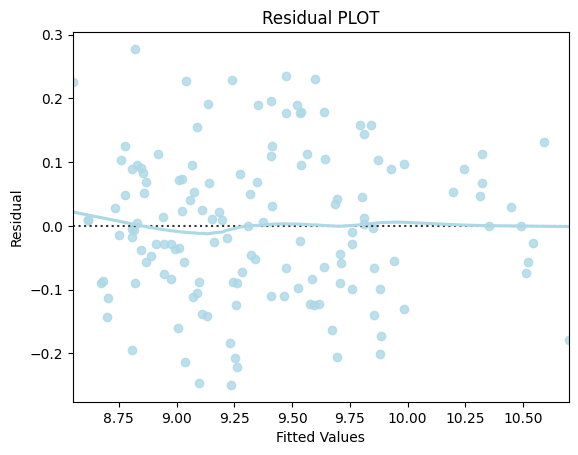

In [ ]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Normality of error terms**

<Axes: ylabel='Count'>

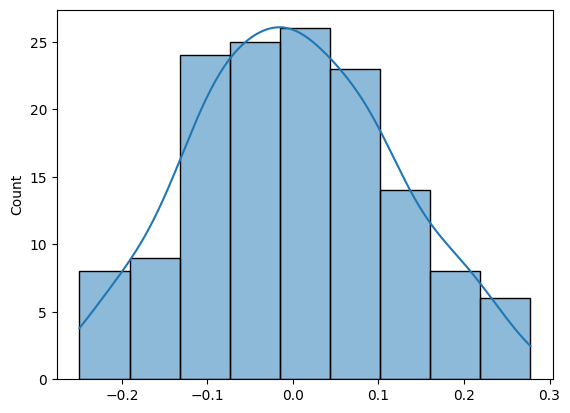

In [ ]:
sns.histplot(residuals, kde=True)

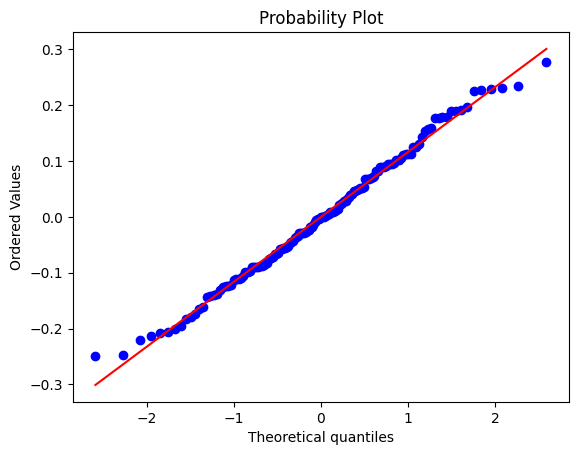

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Check the performance of the model on the train and test data set**

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.114869  0.093406  0.997871
1   Test  0.204218  0.146891  1.573551


**Use cross-validation to improve the model**

In [ ]:
from sklearn.model_selection import cross_val_score

# build the regression model and
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10) #write your code here
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error') #write your code here

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.451 (+/- 0.993)
Mean Squared Error: 0.127 (+/- 0.237)


**Get the model coefficients and write the equation of the linear regression model**

In [ ]:
coef = model2.params #write your code here
out=pd.DataFrame(coef, columns=['Coefficients'])
out

Coefficients
const                      1.157192
wheelbase                  0.007231
carlength                 -0.003265
carwidth                   0.069290
carheight                  0.004877
enginesize                 0.004877
boreratio                 -0.158462
stroke                    -0.175954
compressionratio           0.361425
horsepower                 0.001993
citympg                   -0.026628
highwaympg                 0.014743
symboling_-1               0.122729
symboling_-2               0.104830
symboling_0                0.258627
symboling_1                0.193467
symboling_2                0.230172
symboling_3                0.247367
fueltype_diesel            0.361425
fueltype_gas               0.795768
aspiration_std             0.539626
aspiration_turbo           0.617566
doornumber_four            0.589029
doornumber_two             0.568164
carbody_convertible        0.379373
carbody_hardtop            0.003106
carbody_hatchback          0.205074
carbody_sedan              0.299741
carbody_wagon              0.269899
drivewheel_4wd             0.388092
drivewheel_fwd             0.301390
drivewheel_rwd             0.467710
enginelocation_front       0.243597
enginelocation_rear        0.913596
enginetype_dohc            0.259367
enginetype_dohcv          -0.117817
enginetype_l               0.051609
enginetype_ohc             0.331670
enginetype_ohcf            0.194611
enginetype_ohcv            0.129046
enginetype_rotor           0.308707
cylindernumber_eight       0.393130
cylindernumber_five        0.270679
cylindernumber_four        0.271343
cylindernumber_six         0.250360
cylindernumber_twelve     -0.337027
cylindernumber_two         0.308707
fuelsystem_1bbl            0.083005
fuelsystem_2bbl            0.022159
fuelsystem_4bbl            0.308707
fuelsystem_idi             0.361425
fuelsystem_mpfi            0.162297
fuelsystem_spdi            0.055271
fuelsystem_spfi            0.164329

In [ ]:
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 1.157192337394715 ) *  const + ( 0.007230951604590974 ) *  wheelbase + ( -0.003265025540897095 ) *  carlength + ( 0.06929037831319013 ) *  carwidth + ( 0.0048768872306847455 ) *  carheight + ( 0.004876778811904944 ) *  enginesize + ( -0.15846187299389125 ) *  boreratio + ( -0.17595430629190034 ) *  stroke + ( 0.36142467045847937 ) *  compressionratio + ( 0.001992957952513589 ) *  horsepower + ( -0.02662825321767298 ) *  citympg + ( 0.01474336189593646 ) *  highwaympg + ( 0.12272851609900523 ) *  symboling_-1 + ( 0.10483000518723251 ) *  symboling_-2 + ( 0.2586271138849526 ) *  symboling_0 + ( 0.19346684499298933 ) *  symboling_1 + ( 0.23017239961637787 ) *  symboling_2 + ( 0.24736745761415813 ) *  symboling_3 + ( 0.3614246704584885 ) *  fueltype_diesel + ( 0.7957676669362318 ) *  fueltype_gas + ( 0.5396264109295292 ) *  aspiration_std + ( 0.6175659264651866 ) *  aspiration_turbo + ( 0.5890286994007925 ) *  doornumber_four + ( 0.5681636379939305 ) *  doornumber_two + ( 0

**Conclusions:**


*  In the used car market, vehicles with larger engines, more horsepower,
and expansive car widths are expected to command higher prices. Cars that demonstrate better fuel efficiency, both in city driving and on the highway, are also likely to be priced higher, reflecting consumer preference for more economical vehicles.

*  Conversely, the value of used cars is predicted to be lower for models that have higher mileage or show signs of significant wear and tear, as indicated by reduced engine performance or less desirable physical dimensions.

*  The model suggests that cars featuring turbocharged engines or those with luxury body styles, such as convertibles, are associated with a premium in the used car market. The presence of certain technological features and modern design elements can also enhance a vehicle's value.

**Business Recommendations:**

*  To optimize your automotive inventory for higher profitability, concentrate on acquiring and featuring vehicles with larger engines and higher horsepower, which command premium prices. In your listings and sales dialogue, underscore fuel efficiency as a key selling point, particularly highlighting the 'citympg' metric for urban consumers who prioritize fuel economy.

*  Additionally, the market trends indicate a preference for wider vehicles. Ensure that dimensions are clearly outlined in your online listings and information cards in showrooms. Elevate your marketing efforts by focusing on the high-value features such as turbocharged engines, convertible models, and capacious interiors, which enhance a vehicle's appeal and justify higher prices.

*  Revise your pricing strategy to incorporate the insights gained from regression analysis. Implement a tiered pricing system that scales with the engine size, horsepower, and width of the car, reflecting the intrinsic value these features contribute to a vehicle's worth.

*  Equip your sales team with the necessary knowledge and scripts to effectively communicate the premium features of your vehicles, emphasizing the value they add. Provide customers with comparative market data to illustrate the relationship between car attributes and their price appreciation, aiding in the decision-making process and potentially expediting the sales cycle.

*  To maintain a competitive edge, routinely update your regression model with current market data to align your pricing and procurement strategies with evolving consumer preferences and economic shifts.

*  Lastly, consider instituting a certification program for vehicles that rank highly on your model's valuation scale. A certified pre-owned program can bolster consumer trust and substantiate higher pricing tiers.